In [1]:
learning_rate = 0.01
num_steps = 20
batch_size = 20
total_numbers = 291
display_step = 1000
examples_to_show = 10
import tensorflow as tf
from sklearn import preprocessing
# Network Parameters
num_hidden_1 = 512 # 1st layer num features
num_hidden_2 = 256
num_hidden_3 = 128
num_hidden_4 = 128# 2nd layer num features (the latent dim)
num_input = 25 
num_classes = 7

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])


weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'encoder_h3': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
    'encoder_h4': tf.Variable(tf.random_normal([num_hidden_3, num_hidden_4])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_4, num_hidden_3])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_3, num_hidden_2])),
    'decoder_h3': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h4': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
    'classifier_h': tf.Variable(tf.random_normal([num_hidden_4, num_classes])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'encoder_b3': tf.Variable(tf.random_normal([num_hidden_3])),
    'encoder_b4': tf.Variable(tf.random_normal([num_hidden_4])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_3])),
    'decoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b3': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b4': tf.Variable(tf.random_normal([num_input])),
    'classifier_b': tf.Variable(tf.random_normal([num_classes])),
}

In [2]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                   biases['encoder_b3']))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['encoder_h4']),
                                   biases['encoder_b4']))
    
    return layer_4


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                   biases['decoder_b3']))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['decoder_h4']),
                                   biases['decoder_b4']))
    return layer_4

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op

label_pred = tf.nn.softmax(tf.add(tf.matmul(encoder_op, weights['classifier_h']), biases['classifier_b']))
y_clipped = tf.clip_by_value(label_pred, 1e-10, 0.9999999)


# Targets (Labels) are the input data.
y_true = X
label_true = Y

# Define loss and optimizer, minimize the squared error
loss_autoencoder = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
cross_entropy_loss = -tf.reduce_mean(tf.reduce_sum(label_true * tf.log(y_clipped)
                         + (1 - label_true) * tf.log(1 - y_clipped), axis=1))
loss_total = loss_autoencoder+cross_entropy_loss

optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss_total)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [3]:
from numpy import genfromtxt
X_tr = genfromtxt('./NewDataForBiplab/DataKharif2017/Train_2017Kharif_NDVI.csv', delimiter=',')
X_te = genfromtxt('./NewDataForBiplab/DataKharif2017/Test_2017Kharif_NDVI.csv', delimiter=',')
data1 = genfromtxt('./NewDataForBiplab/DataKharif2017/Train_2017Kharif_Gamma_VH.csv', delimiter=',')
data2 = genfromtxt('./NewDataForBiplab/DataKharif2017/Test_2017Kharif_Gamma_VH.csv', delimiter=',')

In [4]:
X_tr = X_tr[1:,:]
X_te = X_te[1:,:]
data1 = data1[1:,:]
data2 = data2[1:,:]
print(X_tr.shape)
print(X_te.shape)

(434, 12)
(112, 12)


In [5]:
print(X_tr.max())
print(X_te.max())

7.01173833972025
7.20733769059501


In [6]:
import numpy as np
from scipy import stats
data1 = np.array(data1)
data2 = np.array(data2)
X_tr = np.array(X_tr)
X_te = np.array(X_te)

data1 = 10*np.log10(data1)
data2 = 10*np.log10(data2)

print(data1.shape)
print(data2.shape)
print(X_tr.shape)

(434, 13)
(112, 13)
(434, 12)


In [7]:
import pandas
colnames = ['Latitude', 'Longitude', 'CropType','SampleYear','ShowingPeriod'
           , 'HarvestingPeriod', 'Others', 'Index']
data3 = pandas.read_csv('./NewDataForBiplab/DataKharif2017/Train_FieldDataKharif2017.csv', names=colnames)
data4 = pandas.read_csv('./NewDataForBiplab/DataKharif2017/Test_FieldDataKharif2017.csv', names=colnames)

In [8]:
ctype1 = data3.CropType.tolist()
ctype2 = data4.CropType.tolist()
print(ctype2)

['CType', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Paddy', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'PearlMillet', 'PearlMillet', 'PearlMillet', 'PearlMillet', 'PearlMillet', 'PearlMillet', 'PearlMillet', 'PigeonPea', 'PigeonPea', 'Sorghum', 'Sorghum', 'Sorghum', 'Sorghum', 'Sorghum', 'Sorghum', 'ForestNonCropland', 'ForestNonCropland', 'ForestNonCropland', 'ForestNonCropland', 'ForestNonCropland', 'ForestNonCropland', 'ForestNonCropland', 'Habitation', 'Habitation', 'Habitation', 'Habitation', 'Habitation', 'Hab

In [9]:
p = np.array(ctype1)
p1=  np.array(ctype2)
print(p.shape)
print(p1.shape)

(435,)
(113,)


In [10]:
lbl1 = ctype1
label = []
for i in range(1,435):
    if(lbl1[i] == "Paddy"):
        label += [0]
    if(lbl1[i] == "Sugarcane"):
        label += [1]
    if(lbl1[i] == "PearlMillet"):
        label += [2]
    if(lbl1[i] == "PigeonPea"):
        label += [3]
    if(lbl1[i] == "Sorghum"):
        label += [4]
    if(lbl1[i] == "ForestNonCropland"):
        label += [5]
    if(lbl1[i] == "Habitation"):
        label += [6]
y_tr = np.array(label)

lbl1 = ctype2
label = []
for i in range(1,113):
    if(lbl1[i] == "Paddy"):
        label += [0]
    if(lbl1[i] == "Sugarcane"):
        label += [1]
    if(lbl1[i] == "PearlMillet"):
        label += [2]
    if(lbl1[i] == "PigeonPea"):
        label += [3]
    if(lbl1[i] == "Sorghum"):
        label += [4]
    if(lbl1[i] == "ForestNonCropland"):
        label += [5]
    if(lbl1[i] == "Habitation"):
        label += [6]
y_te = np.array(label)

print(y_tr.shape)
print(y_te.shape)
print(y_te)

(434,)
(112,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 4 4 4 4 4 4 5 5 5 5 5 5 5 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6]


In [11]:
X_tr = preprocessing.scale(X_tr)
X_te = preprocessing.scale(X_te)
data1 = preprocessing.scale(data1)
data2 = preprocessing.scale(data2)

In [12]:
X_tr = np.concatenate((X_tr,data1), axis=1)
X_te = np.concatenate((X_te,data2), axis=1)
X_tr = preprocessing.scale(X_tr)
X_te = preprocessing.scale(X_te)
print(X_tr.shape)

(434, 25)


In [13]:
x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
l6=[]
l7=[]
for i in range(0, y_te.shape[0]):
    if(label[i]==0):
        x1.append(X_te[i])
        l1.append([1,0,0,0,0,0,0])
    if(label[i]==1):
        x2.append(X_te[i])
        l2.append([0,1,0,0,0,0,0])
    if(label[i]==2):
        x3.append(X_te[i])
        l3.append([0,0,1,0,0,0,0])
    if(label[i]==3):
        x4.append(X_te[i])
        l4.append([0,0,0,1,0,0,0])
    if(label[i]==4):
        x5.append(X_te[i])
        l5.append([0,0,0,0,1,0,0])
    if(label[i]==5):
        x6.append(X_te[i])
        l6.append([0,0,0,0,0,1,0])
    if(label[i]==6):
        x7.append(X_te[i])
        l7.append([0,0,0,0,0,0,1])
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)
x4=np.array(x4)
x5=np.array(x5)
x6=np.array(x6)
x7=np.array(x7)

l1=np.array(l1)
l2=np.array(l2)
l3=np.array(l3)
l4=np.array(l4)
l5=np.array(l5)
l6=np.array(l6)
l7=np.array(l7)

print(l7.shape)
print(x6.shape)

(42, 7)
(7, 25)


In [14]:
from sklearn.utils import shuffle
X_tr, y_tr = shuffle(X_tr, y_tr, random_state = 0)
X_te, y_te = shuffle(X_te, y_te, random_state = 0)

In [15]:
print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)
print(y_te.shape)

(434, 25)
(112, 25)
(434,)
(112,)


In [16]:
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_te)
y_train = np_utils.to_categorical(y_tr)
print(y_train.shape)
print(y_test.shape)

(434, 7)
(112, 7)


/home/aniruddha/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [28]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)
batch_size = 20
num_batch = 21

# Training
acc = []
for i in range(0,10000):
    k = 0 
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    avg_cost = 0
    for j in (0,num_batch):
        batch_x = X_tr[k:k+batch_size,:]
        batch_y = y_train[k:k+batch_size,:]
        k += batch_size

    # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss_total], feed_dict={X: batch_x, Y: batch_y})
        avg_cost += l / num_batch
    print("Epoch:", (i + 1), "cost =", "{:.8f}".format(avg_cost))
    if(i%100==0):
        acc.append(sess.run(accuracy, feed_dict={X: X_te, Y: y_test}))
        
acc = np.array(acc)

Epoch: 1 cost = 1.22094854
Epoch: 2 cost = 0.87185351
Epoch: 3 cost = 0.72247850
Epoch: 4 cost = 0.59541725
Epoch: 5 cost = 0.48615224
Epoch: 6 cost = 0.41900103
Epoch: 7 cost = 0.38055363
Epoch: 8 cost = 0.35103163
Epoch: 9 cost = 0.32636121
Epoch: 10 cost = 0.30465267
Epoch: 11 cost = 0.28428134
Epoch: 12 cost = 0.26441179
Epoch: 13 cost = 0.24579374
Epoch: 14 cost = 0.22952702
Epoch: 15 cost = 0.21552523
Epoch: 16 cost = 0.20359977
Epoch: 17 cost = 0.19293915
Epoch: 18 cost = 0.18310687
Epoch: 19 cost = 0.17446469
Epoch: 20 cost = 0.16742423
Epoch: 21 cost = 0.16167330
Epoch: 22 cost = 0.15686094
Epoch: 23 cost = 0.15295383
Epoch: 24 cost = 0.14973693
Epoch: 25 cost = 0.14695153
Epoch: 26 cost = 0.14416570
Epoch: 27 cost = 0.14074872
Epoch: 28 cost = 0.13767814
Epoch: 29 cost = 0.13528866
Epoch: 30 cost = 0.13333216
Epoch: 31 cost = 0.13177318
Epoch: 32 cost = 0.13057895
Epoch: 33 cost = 0.12937521
Epoch: 34 cost = 0.12850677
Epoch: 35 cost = 0.12771576
Epoch: 36 cost = 0.12687106
E

Epoch: 314 cost = 0.09581512
Epoch: 315 cost = 0.09684021
Epoch: 316 cost = 0.09796982
Epoch: 317 cost = 0.09565167
Epoch: 318 cost = 0.10229359
Epoch: 319 cost = 0.10764827
Epoch: 320 cost = 0.09620295
Epoch: 321 cost = 0.09564276
Epoch: 322 cost = 0.09539001
Epoch: 323 cost = 0.09527314
Epoch: 324 cost = 0.09514552
Epoch: 325 cost = 0.09466904
Epoch: 326 cost = 0.09602949
Epoch: 327 cost = 0.09574906
Epoch: 328 cost = 0.09598928
Epoch: 329 cost = 0.09649197
Epoch: 330 cost = 0.09617590
Epoch: 331 cost = 0.09458665
Epoch: 332 cost = 0.09569853
Epoch: 333 cost = 0.09453745
Epoch: 334 cost = 0.09441379
Epoch: 335 cost = 0.09443036
Epoch: 336 cost = 0.09420855
Epoch: 337 cost = 0.09373034
Epoch: 338 cost = 0.09631087
Epoch: 339 cost = 0.09434863
Epoch: 340 cost = 0.09461462
Epoch: 341 cost = 0.09501226
Epoch: 342 cost = 0.09366113
Epoch: 343 cost = 0.09569193
Epoch: 344 cost = 0.09395486
Epoch: 345 cost = 0.09381470
Epoch: 346 cost = 0.09374474
Epoch: 347 cost = 0.09311269
Epoch: 348 cos

Epoch: 604 cost = 0.08832130
Epoch: 605 cost = 0.08887592
Epoch: 606 cost = 0.08735182
Epoch: 607 cost = 0.08756857
Epoch: 608 cost = 0.08938420
Epoch: 609 cost = 0.08905158
Epoch: 610 cost = 0.08868371
Epoch: 611 cost = 0.08823318
Epoch: 612 cost = 0.08742903
Epoch: 613 cost = 0.08757067
Epoch: 614 cost = 0.08820374
Epoch: 615 cost = 0.08916780
Epoch: 616 cost = 0.08849130
Epoch: 617 cost = 0.08902463
Epoch: 618 cost = 0.08879720
Epoch: 619 cost = 0.08839551
Epoch: 620 cost = 0.08768828
Epoch: 621 cost = 0.08766782
Epoch: 622 cost = 0.08918062
Epoch: 623 cost = 0.08858002
Epoch: 624 cost = 0.08806485
Epoch: 625 cost = 0.08786893
Epoch: 626 cost = 0.08729367
Epoch: 627 cost = 0.08729279
Epoch: 628 cost = 0.08806029
Epoch: 629 cost = 0.08741772
Epoch: 630 cost = 0.08734041
Epoch: 631 cost = 0.08731344
Epoch: 632 cost = 0.08740131
Epoch: 633 cost = 0.08980383
Epoch: 634 cost = 0.09077639
Epoch: 635 cost = 0.08907567
Epoch: 636 cost = 0.08813981
Epoch: 637 cost = 0.08779212
Epoch: 638 cos

Epoch: 890 cost = 0.08709578
Epoch: 891 cost = 0.08712550
Epoch: 892 cost = 0.08710871
Epoch: 893 cost = 0.08701309
Epoch: 894 cost = 0.08686388
Epoch: 895 cost = 0.08683076
Epoch: 896 cost = 0.08678342
Epoch: 897 cost = 0.08674086
Epoch: 898 cost = 0.08681836
Epoch: 899 cost = 0.08726985
Epoch: 900 cost = 0.08695626
Epoch: 901 cost = 0.08704191
Epoch: 902 cost = 0.08684488
Epoch: 903 cost = 0.08695358
Epoch: 904 cost = 0.08679325
Epoch: 905 cost = 0.08724759
Epoch: 906 cost = 0.08749955
Epoch: 907 cost = 0.08778428
Epoch: 908 cost = 0.08796441
Epoch: 909 cost = 0.08783849
Epoch: 910 cost = 0.08874954
Epoch: 911 cost = 0.08812629
Epoch: 912 cost = 0.08768666
Epoch: 913 cost = 0.08688710
Epoch: 914 cost = 0.08681536
Epoch: 915 cost = 0.08682696
Epoch: 916 cost = 0.08671442
Epoch: 917 cost = 0.08686828
Epoch: 918 cost = 0.08677165
Epoch: 919 cost = 0.08671965
Epoch: 920 cost = 0.08682936
Epoch: 921 cost = 0.08672716
Epoch: 922 cost = 0.08695420
Epoch: 923 cost = 0.08687822
Epoch: 924 cos

Epoch: 1179 cost = 0.08110305
Epoch: 1180 cost = 0.08116639
Epoch: 1181 cost = 0.08104559
Epoch: 1182 cost = 0.08113186
Epoch: 1183 cost = 0.08090093
Epoch: 1184 cost = 0.08089853
Epoch: 1185 cost = 0.08104332
Epoch: 1186 cost = 0.08092283
Epoch: 1187 cost = 0.08095046
Epoch: 1188 cost = 0.08144630
Epoch: 1189 cost = 0.08107029
Epoch: 1190 cost = 0.08115181
Epoch: 1191 cost = 0.08092046
Epoch: 1192 cost = 0.08085919
Epoch: 1193 cost = 0.08100492
Epoch: 1194 cost = 0.08099167
Epoch: 1195 cost = 0.08075374
Epoch: 1196 cost = 0.08103706
Epoch: 1197 cost = 0.08116209
Epoch: 1198 cost = 0.08111911
Epoch: 1199 cost = 0.08108403
Epoch: 1200 cost = 0.08123595
Epoch: 1201 cost = 0.08120684
Epoch: 1202 cost = 0.08153593
Epoch: 1203 cost = 0.08137260
Epoch: 1204 cost = 0.08143216
Epoch: 1205 cost = 0.08110370
Epoch: 1206 cost = 0.08108424
Epoch: 1207 cost = 0.08102467
Epoch: 1208 cost = 0.08095433
Epoch: 1209 cost = 0.08083431
Epoch: 1210 cost = 0.08096124
Epoch: 1211 cost = 0.08091608
Epoch: 121

Epoch: 1474 cost = 0.08071429
Epoch: 1475 cost = 0.08067693
Epoch: 1476 cost = 0.08083282
Epoch: 1477 cost = 0.08070050
Epoch: 1478 cost = 0.08067322
Epoch: 1479 cost = 0.08066286
Epoch: 1480 cost = 0.08062866
Epoch: 1481 cost = 0.08082972
Epoch: 1482 cost = 0.08086062
Epoch: 1483 cost = 0.08064535
Epoch: 1484 cost = 0.08052831
Epoch: 1485 cost = 0.08051209
Epoch: 1486 cost = 0.08072263
Epoch: 1487 cost = 0.08064799
Epoch: 1488 cost = 0.08169297
Epoch: 1489 cost = 0.08092400
Epoch: 1490 cost = 0.08117609
Epoch: 1491 cost = 0.08081772
Epoch: 1492 cost = 0.08071563
Epoch: 1493 cost = 0.08068841
Epoch: 1494 cost = 0.08062028
Epoch: 1495 cost = 0.08080318
Epoch: 1496 cost = 0.08077531
Epoch: 1497 cost = 0.08057083
Epoch: 1498 cost = 0.08087197
Epoch: 1499 cost = 0.08069876
Epoch: 1500 cost = 0.08070152
Epoch: 1501 cost = 0.08070958
Epoch: 1502 cost = 0.08070911
Epoch: 1503 cost = 0.08070223
Epoch: 1504 cost = 0.08069498
Epoch: 1505 cost = 0.08087751
Epoch: 1506 cost = 0.08063889
Epoch: 150

Epoch: 1767 cost = 0.08047496
Epoch: 1768 cost = 0.08038960
Epoch: 1769 cost = 0.08049890
Epoch: 1770 cost = 0.08044432
Epoch: 1771 cost = 0.08036806
Epoch: 1772 cost = 0.08053440
Epoch: 1773 cost = 0.08056748
Epoch: 1774 cost = 0.08057920
Epoch: 1775 cost = 0.08048804
Epoch: 1776 cost = 0.08034332
Epoch: 1777 cost = 0.08056975
Epoch: 1778 cost = 0.08042597
Epoch: 1779 cost = 0.08036763
Epoch: 1780 cost = 0.08037393
Epoch: 1781 cost = 0.08030216
Epoch: 1782 cost = 0.08060260
Epoch: 1783 cost = 0.08046472
Epoch: 1784 cost = 0.08047162
Epoch: 1785 cost = 0.08044627
Epoch: 1786 cost = 0.08055951
Epoch: 1787 cost = 0.08042071
Epoch: 1788 cost = 0.08052734
Epoch: 1789 cost = 0.08049650
Epoch: 1790 cost = 0.08055003
Epoch: 1791 cost = 0.08063482
Epoch: 1792 cost = 0.08051544
Epoch: 1793 cost = 0.08053467
Epoch: 1794 cost = 0.08046308
Epoch: 1795 cost = 0.08026572
Epoch: 1796 cost = 0.08052094
Epoch: 1797 cost = 0.08050391
Epoch: 1798 cost = 0.08046433
Epoch: 1799 cost = 0.08029098
Epoch: 180

Epoch: 2056 cost = 0.08047072
Epoch: 2057 cost = 0.08039255
Epoch: 2058 cost = 0.08019645
Epoch: 2059 cost = 0.08041144
Epoch: 2060 cost = 0.08038021
Epoch: 2061 cost = 0.08040049
Epoch: 2062 cost = 0.08035836
Epoch: 2063 cost = 0.08054472
Epoch: 2064 cost = 0.08027740
Epoch: 2065 cost = 0.08049977
Epoch: 2066 cost = 0.08054317
Epoch: 2067 cost = 0.08046799
Epoch: 2068 cost = 0.08029038
Epoch: 2069 cost = 0.08036431
Epoch: 2070 cost = 0.08044329
Epoch: 2071 cost = 0.08044315
Epoch: 2072 cost = 0.08063649
Epoch: 2073 cost = 0.08044167
Epoch: 2074 cost = 0.08053827
Epoch: 2075 cost = 0.08060206
Epoch: 2076 cost = 0.08050461
Epoch: 2077 cost = 0.08056196
Epoch: 2078 cost = 0.08029688
Epoch: 2079 cost = 0.08046628
Epoch: 2080 cost = 0.08041124
Epoch: 2081 cost = 0.08056750
Epoch: 2082 cost = 0.08025854
Epoch: 2083 cost = 0.08045063
Epoch: 2084 cost = 0.08041353
Epoch: 2085 cost = 0.08038514
Epoch: 2086 cost = 0.08071137
Epoch: 2087 cost = 0.08050184
Epoch: 2088 cost = 0.08027288
Epoch: 208

Epoch: 2349 cost = 0.08041102
Epoch: 2350 cost = 0.08044088
Epoch: 2351 cost = 0.08038291
Epoch: 2352 cost = 0.08041381
Epoch: 2353 cost = 0.08053187
Epoch: 2354 cost = 0.08053247
Epoch: 2355 cost = 0.08048990
Epoch: 2356 cost = 0.08040080
Epoch: 2357 cost = 0.08055760
Epoch: 2358 cost = 0.08031373
Epoch: 2359 cost = 0.08058197
Epoch: 2360 cost = 0.08042971
Epoch: 2361 cost = 0.08046278
Epoch: 2362 cost = 0.08031916
Epoch: 2363 cost = 0.08052925
Epoch: 2364 cost = 0.08031658
Epoch: 2365 cost = 0.08051300
Epoch: 2366 cost = 0.08062694
Epoch: 2367 cost = 0.08037709
Epoch: 2368 cost = 0.08036373
Epoch: 2369 cost = 0.08041723
Epoch: 2370 cost = 0.08037252
Epoch: 2371 cost = 0.08027316
Epoch: 2372 cost = 0.08044181
Epoch: 2373 cost = 0.08039222
Epoch: 2374 cost = 0.08041233
Epoch: 2375 cost = 0.08044235
Epoch: 2376 cost = 0.08048165
Epoch: 2377 cost = 0.08037801
Epoch: 2378 cost = 0.08044574
Epoch: 2379 cost = 0.08048332
Epoch: 2380 cost = 0.08045499
Epoch: 2381 cost = 0.08042628
Epoch: 238

Epoch: 2643 cost = 0.08049912
Epoch: 2644 cost = 0.08037981
Epoch: 2645 cost = 0.08051459
Epoch: 2646 cost = 0.08045130
Epoch: 2647 cost = 0.08047410
Epoch: 2648 cost = 0.08043103
Epoch: 2649 cost = 0.08035905
Epoch: 2650 cost = 0.08030235
Epoch: 2651 cost = 0.08054625
Epoch: 2652 cost = 0.08049746
Epoch: 2653 cost = 0.08037941
Epoch: 2654 cost = 0.08034029
Epoch: 2655 cost = 0.08049310
Epoch: 2656 cost = 0.08025111
Epoch: 2657 cost = 0.08046783
Epoch: 2658 cost = 0.08039776
Epoch: 2659 cost = 0.08042171
Epoch: 2660 cost = 0.08041152
Epoch: 2661 cost = 0.08051591
Epoch: 2662 cost = 0.08033215
Epoch: 2663 cost = 0.08042357
Epoch: 2664 cost = 0.08063450
Epoch: 2665 cost = 0.08073546
Epoch: 2666 cost = 0.08035218
Epoch: 2667 cost = 0.08051169
Epoch: 2668 cost = 0.08034137
Epoch: 2669 cost = 0.08034721
Epoch: 2670 cost = 0.08041632
Epoch: 2671 cost = 0.08052010
Epoch: 2672 cost = 0.08041409
Epoch: 2673 cost = 0.08037536
Epoch: 2674 cost = 0.08043871
Epoch: 2675 cost = 0.08048235
Epoch: 267

Epoch: 2933 cost = 0.08035640
Epoch: 2934 cost = 0.08046010
Epoch: 2935 cost = 0.08053059
Epoch: 2936 cost = 0.08044587
Epoch: 2937 cost = 0.08034571
Epoch: 2938 cost = 0.08030303
Epoch: 2939 cost = 0.08064406
Epoch: 2940 cost = 0.08035261
Epoch: 2941 cost = 0.08030231
Epoch: 2942 cost = 0.08038923
Epoch: 2943 cost = 0.08046634
Epoch: 2944 cost = 0.08030974
Epoch: 2945 cost = 0.08034758
Epoch: 2946 cost = 0.08045054
Epoch: 2947 cost = 0.08042047
Epoch: 2948 cost = 0.08028992
Epoch: 2949 cost = 0.08024966
Epoch: 2950 cost = 0.08047070
Epoch: 2951 cost = 0.08025367
Epoch: 2952 cost = 0.08050034
Epoch: 2953 cost = 0.08034288
Epoch: 2954 cost = 0.08024100
Epoch: 2955 cost = 0.08061905
Epoch: 2956 cost = 0.08045728
Epoch: 2957 cost = 0.08030804
Epoch: 2958 cost = 0.08052664
Epoch: 2959 cost = 0.08029430
Epoch: 2960 cost = 0.08057633
Epoch: 2961 cost = 0.08031125
Epoch: 2962 cost = 0.08037751
Epoch: 2963 cost = 0.08057523
Epoch: 2964 cost = 0.08056517
Epoch: 2965 cost = 0.08043161
Epoch: 296

Epoch: 3220 cost = 0.08035233
Epoch: 3221 cost = 0.08044181
Epoch: 3222 cost = 0.08050558
Epoch: 3223 cost = 0.08061963
Epoch: 3224 cost = 0.08059831
Epoch: 3225 cost = 0.08038230
Epoch: 3226 cost = 0.08041311
Epoch: 3227 cost = 0.08023141
Epoch: 3228 cost = 0.08038548
Epoch: 3229 cost = 0.08024232
Epoch: 3230 cost = 0.08023582
Epoch: 3231 cost = 0.08042269
Epoch: 3232 cost = 0.08043180
Epoch: 3233 cost = 0.08034831
Epoch: 3234 cost = 0.08023872
Epoch: 3235 cost = 0.08030156
Epoch: 3236 cost = 0.08039615
Epoch: 3237 cost = 0.08055908
Epoch: 3238 cost = 0.08064479
Epoch: 3239 cost = 0.08036864
Epoch: 3240 cost = 0.08052509
Epoch: 3241 cost = 0.08035279
Epoch: 3242 cost = 0.08030548
Epoch: 3243 cost = 0.08049167
Epoch: 3244 cost = 0.08039776
Epoch: 3245 cost = 0.08030991
Epoch: 3246 cost = 0.08045188
Epoch: 3247 cost = 0.08033603
Epoch: 3248 cost = 0.08040046
Epoch: 3249 cost = 0.08063090
Epoch: 3250 cost = 0.08046750
Epoch: 3251 cost = 0.08034496
Epoch: 3252 cost = 0.08054710
Epoch: 325

Epoch: 3513 cost = 0.08048715
Epoch: 3514 cost = 0.08034763
Epoch: 3515 cost = 0.08067390
Epoch: 3516 cost = 0.08050614
Epoch: 3517 cost = 0.08045705
Epoch: 3518 cost = 0.08042413
Epoch: 3519 cost = 0.08045373
Epoch: 3520 cost = 0.08044606
Epoch: 3521 cost = 0.08054994
Epoch: 3522 cost = 0.08031556
Epoch: 3523 cost = 0.08032390
Epoch: 3524 cost = 0.08046240
Epoch: 3525 cost = 0.08037634
Epoch: 3526 cost = 0.08029042
Epoch: 3527 cost = 0.08044403
Epoch: 3528 cost = 0.08035684
Epoch: 3529 cost = 0.08048184
Epoch: 3530 cost = 0.08039703
Epoch: 3531 cost = 0.08026336
Epoch: 3532 cost = 0.08038970
Epoch: 3533 cost = 0.08050989
Epoch: 3534 cost = 0.08032642
Epoch: 3535 cost = 0.08034494
Epoch: 3536 cost = 0.08028458
Epoch: 3537 cost = 0.08039866
Epoch: 3538 cost = 0.08052434
Epoch: 3539 cost = 0.08046688
Epoch: 3540 cost = 0.08042223
Epoch: 3541 cost = 0.08050727
Epoch: 3542 cost = 0.08052394
Epoch: 3543 cost = 0.08038452
Epoch: 3544 cost = 0.08036144
Epoch: 3545 cost = 0.08014389
Epoch: 354

Epoch: 3803 cost = 0.08037292
Epoch: 3804 cost = 0.08028835
Epoch: 3805 cost = 0.08028880
Epoch: 3806 cost = 0.08065829
Epoch: 3807 cost = 0.08047030
Epoch: 3808 cost = 0.08055694
Epoch: 3809 cost = 0.08045639
Epoch: 3810 cost = 0.08043772
Epoch: 3811 cost = 0.08027634
Epoch: 3812 cost = 0.08034711
Epoch: 3813 cost = 0.08032619
Epoch: 3814 cost = 0.08043559
Epoch: 3815 cost = 0.08030688
Epoch: 3816 cost = 0.08046116
Epoch: 3817 cost = 0.08047302
Epoch: 3818 cost = 0.08038637
Epoch: 3819 cost = 0.08031673
Epoch: 3820 cost = 0.08026823
Epoch: 3821 cost = 0.08038087
Epoch: 3822 cost = 0.08033767
Epoch: 3823 cost = 0.08026174
Epoch: 3824 cost = 0.08044098
Epoch: 3825 cost = 0.08046075
Epoch: 3826 cost = 0.08063085
Epoch: 3827 cost = 0.08051325
Epoch: 3828 cost = 0.08032323
Epoch: 3829 cost = 0.08035086
Epoch: 3830 cost = 0.08062816
Epoch: 3831 cost = 0.08034872
Epoch: 3832 cost = 0.08025673
Epoch: 3833 cost = 0.08045585
Epoch: 3834 cost = 0.08025216
Epoch: 3835 cost = 0.08037113
Epoch: 383

Epoch: 4099 cost = 0.08047187
Epoch: 4100 cost = 0.08031278
Epoch: 4101 cost = 0.08026405
Epoch: 4102 cost = 0.08039320
Epoch: 4103 cost = 0.08052710
Epoch: 4104 cost = 0.08041949
Epoch: 4105 cost = 0.08051644
Epoch: 4106 cost = 0.08018012
Epoch: 4107 cost = 0.08023249
Epoch: 4108 cost = 0.08052388
Epoch: 4109 cost = 0.08043744
Epoch: 4110 cost = 0.08051305
Epoch: 4111 cost = 0.08022329
Epoch: 4112 cost = 0.08034858
Epoch: 4113 cost = 0.08015424
Epoch: 4114 cost = 0.08049117
Epoch: 4115 cost = 0.08038884
Epoch: 4116 cost = 0.08040138
Epoch: 4117 cost = 0.08045690
Epoch: 4118 cost = 0.08043128
Epoch: 4119 cost = 0.08033448
Epoch: 4120 cost = 0.08025644
Epoch: 4121 cost = 0.08054442
Epoch: 4122 cost = 0.08038662
Epoch: 4123 cost = 0.08027280
Epoch: 4124 cost = 0.08039859
Epoch: 4125 cost = 0.08047119
Epoch: 4126 cost = 0.08062023
Epoch: 4127 cost = 0.08032811
Epoch: 4128 cost = 0.08035544
Epoch: 4129 cost = 0.08027685
Epoch: 4130 cost = 0.08043317
Epoch: 4131 cost = 0.08042701
Epoch: 413

Epoch: 4387 cost = 0.08015107
Epoch: 4388 cost = 0.08040976
Epoch: 4389 cost = 0.08059077
Epoch: 4390 cost = 0.08044438
Epoch: 4391 cost = 0.08055168
Epoch: 4392 cost = 0.08050723
Epoch: 4393 cost = 0.08047202
Epoch: 4394 cost = 0.08044295
Epoch: 4395 cost = 0.08029966
Epoch: 4396 cost = 0.08038456
Epoch: 4397 cost = 0.08022102
Epoch: 4398 cost = 0.08048201
Epoch: 4399 cost = 0.08025288
Epoch: 4400 cost = 0.08036726
Epoch: 4401 cost = 0.08037764
Epoch: 4402 cost = 0.08023250
Epoch: 4403 cost = 0.08042555
Epoch: 4404 cost = 0.08043106
Epoch: 4405 cost = 0.08033845
Epoch: 4406 cost = 0.08031152
Epoch: 4407 cost = 0.08039736
Epoch: 4408 cost = 0.08045614
Epoch: 4409 cost = 0.08037884
Epoch: 4410 cost = 0.08035803
Epoch: 4411 cost = 0.08058536
Epoch: 4412 cost = 0.08035465
Epoch: 4413 cost = 0.08037649
Epoch: 4414 cost = 0.08045071
Epoch: 4415 cost = 0.08041920
Epoch: 4416 cost = 0.08058404
Epoch: 4417 cost = 0.08044543
Epoch: 4418 cost = 0.08037270
Epoch: 4419 cost = 0.08040621
Epoch: 442

Epoch: 4678 cost = 0.08039805
Epoch: 4679 cost = 0.08044799
Epoch: 4680 cost = 0.08032916
Epoch: 4681 cost = 0.08019421
Epoch: 4682 cost = 0.08027377
Epoch: 4683 cost = 0.08037286
Epoch: 4684 cost = 0.08036209
Epoch: 4685 cost = 0.08039635
Epoch: 4686 cost = 0.08049071
Epoch: 4687 cost = 0.08029906
Epoch: 4688 cost = 0.08022634
Epoch: 4689 cost = 0.08056973
Epoch: 4690 cost = 0.08062086
Epoch: 4691 cost = 0.08044730
Epoch: 4692 cost = 0.08041703
Epoch: 4693 cost = 0.08030752
Epoch: 4694 cost = 0.08037332
Epoch: 4695 cost = 0.08041639
Epoch: 4696 cost = 0.08037536
Epoch: 4697 cost = 0.08033014
Epoch: 4698 cost = 0.08032938
Epoch: 4699 cost = 0.08026726
Epoch: 4700 cost = 0.08064323
Epoch: 4701 cost = 0.08034125
Epoch: 4702 cost = 0.08025295
Epoch: 4703 cost = 0.08033570
Epoch: 4704 cost = 0.08032351
Epoch: 4705 cost = 0.08045231
Epoch: 4706 cost = 0.08043739
Epoch: 4707 cost = 0.08064608
Epoch: 4708 cost = 0.08041093
Epoch: 4709 cost = 0.08050850
Epoch: 4710 cost = 0.08036176
Epoch: 471

Epoch: 4960 cost = 0.08042220
Epoch: 4961 cost = 0.08051046
Epoch: 4962 cost = 0.08033839
Epoch: 4963 cost = 0.08036087
Epoch: 4964 cost = 0.08030163
Epoch: 4965 cost = 0.08052648
Epoch: 4966 cost = 0.08026313
Epoch: 4967 cost = 0.08042622
Epoch: 4968 cost = 0.08035061
Epoch: 4969 cost = 0.08058182
Epoch: 4970 cost = 0.08034592
Epoch: 4971 cost = 0.08020796
Epoch: 4972 cost = 0.08056024
Epoch: 4973 cost = 0.08034032
Epoch: 4974 cost = 0.08037849
Epoch: 4975 cost = 0.08045812
Epoch: 4976 cost = 0.08057104
Epoch: 4977 cost = 0.08040239
Epoch: 4978 cost = 0.08041664
Epoch: 4979 cost = 0.08045667
Epoch: 4980 cost = 0.08027208
Epoch: 4981 cost = 0.08041128
Epoch: 4982 cost = 0.08019387
Epoch: 4983 cost = 0.08044629
Epoch: 4984 cost = 0.08019580
Epoch: 4985 cost = 0.08043296
Epoch: 4986 cost = 0.08050491
Epoch: 4987 cost = 0.08057251
Epoch: 4988 cost = 0.08030972
Epoch: 4989 cost = 0.08030619
Epoch: 4990 cost = 0.08031761
Epoch: 4991 cost = 0.08054964
Epoch: 4992 cost = 0.08041782
Epoch: 499

Epoch: 5254 cost = 0.08028328
Epoch: 5255 cost = 0.08037647
Epoch: 5256 cost = 0.08021813
Epoch: 5257 cost = 0.08042695
Epoch: 5258 cost = 0.08045061
Epoch: 5259 cost = 0.08045961
Epoch: 5260 cost = 0.08035861
Epoch: 5261 cost = 0.08052068
Epoch: 5262 cost = 0.08043827
Epoch: 5263 cost = 0.08027761
Epoch: 5264 cost = 0.08042517
Epoch: 5265 cost = 0.08035596
Epoch: 5266 cost = 0.08044134
Epoch: 5267 cost = 0.08038151
Epoch: 5268 cost = 0.08041721
Epoch: 5269 cost = 0.08036682
Epoch: 5270 cost = 0.08024934
Epoch: 5271 cost = 0.08048282
Epoch: 5272 cost = 0.08044263
Epoch: 5273 cost = 0.08030239
Epoch: 5274 cost = 0.08047994
Epoch: 5275 cost = 0.08048290
Epoch: 5276 cost = 0.08039151
Epoch: 5277 cost = 0.08045415
Epoch: 5278 cost = 0.08022665
Epoch: 5279 cost = 0.08037036
Epoch: 5280 cost = 0.08035010
Epoch: 5281 cost = 0.08030459
Epoch: 5282 cost = 0.08056089
Epoch: 5283 cost = 0.08049400
Epoch: 5284 cost = 0.08032986
Epoch: 5285 cost = 0.08049235
Epoch: 5286 cost = 0.08039880
Epoch: 528

Epoch: 5546 cost = 0.08035675
Epoch: 5547 cost = 0.08044964
Epoch: 5548 cost = 0.08033988
Epoch: 5549 cost = 0.08040510
Epoch: 5550 cost = 0.08038869
Epoch: 5551 cost = 0.08037504
Epoch: 5552 cost = 0.08040489
Epoch: 5553 cost = 0.08056699
Epoch: 5554 cost = 0.08024043
Epoch: 5555 cost = 0.08034833
Epoch: 5556 cost = 0.08041297
Epoch: 5557 cost = 0.08026837
Epoch: 5558 cost = 0.08024672
Epoch: 5559 cost = 0.08045381
Epoch: 5560 cost = 0.08038517
Epoch: 5561 cost = 0.08024721
Epoch: 5562 cost = 0.08028094
Epoch: 5563 cost = 0.08043356
Epoch: 5564 cost = 0.08043185
Epoch: 5565 cost = 0.08062427
Epoch: 5566 cost = 0.08038143
Epoch: 5567 cost = 0.08039796
Epoch: 5568 cost = 0.08036682
Epoch: 5569 cost = 0.08040703
Epoch: 5570 cost = 0.08024837
Epoch: 5571 cost = 0.08034982
Epoch: 5572 cost = 0.08062572
Epoch: 5573 cost = 0.08042180
Epoch: 5574 cost = 0.08053375
Epoch: 5575 cost = 0.08045121
Epoch: 5576 cost = 0.08030977
Epoch: 5577 cost = 0.08021503
Epoch: 5578 cost = 0.08044618
Epoch: 557

Epoch: 5836 cost = 0.08033110
Epoch: 5837 cost = 0.08038528
Epoch: 5838 cost = 0.08029132
Epoch: 5839 cost = 0.08033477
Epoch: 5840 cost = 0.08025839
Epoch: 5841 cost = 0.08036202
Epoch: 5842 cost = 0.08067562
Epoch: 5843 cost = 0.08036557
Epoch: 5844 cost = 0.08040424
Epoch: 5845 cost = 0.08039738
Epoch: 5846 cost = 0.08031108
Epoch: 5847 cost = 0.08021186
Epoch: 5848 cost = 0.08053980
Epoch: 5849 cost = 0.08056672
Epoch: 5850 cost = 0.08037609
Epoch: 5851 cost = 0.08043639
Epoch: 5852 cost = 0.08045797
Epoch: 5853 cost = 0.08030593
Epoch: 5854 cost = 0.08032343
Epoch: 5855 cost = 0.08030524
Epoch: 5856 cost = 0.08054145
Epoch: 5857 cost = 0.08052276
Epoch: 5858 cost = 0.08023252
Epoch: 5859 cost = 0.08040338
Epoch: 5860 cost = 0.08039855
Epoch: 5861 cost = 0.08030911
Epoch: 5862 cost = 0.08044290
Epoch: 5863 cost = 0.08035324
Epoch: 5864 cost = 0.08036538
Epoch: 5865 cost = 0.08039263
Epoch: 5866 cost = 0.08046701
Epoch: 5867 cost = 0.08046425
Epoch: 5868 cost = 0.08036572
Epoch: 586

Epoch: 6120 cost = 0.08039391
Epoch: 6121 cost = 0.08048831
Epoch: 6122 cost = 0.08034849
Epoch: 6123 cost = 0.08054074
Epoch: 6124 cost = 0.08032283
Epoch: 6125 cost = 0.08023483
Epoch: 6126 cost = 0.08047652
Epoch: 6127 cost = 0.08024879
Epoch: 6128 cost = 0.08036239
Epoch: 6129 cost = 0.08052502
Epoch: 6130 cost = 0.08024078
Epoch: 6131 cost = 0.08028938
Epoch: 6132 cost = 0.08046451
Epoch: 6133 cost = 0.08017213
Epoch: 6134 cost = 0.08023999
Epoch: 6135 cost = 0.08034209
Epoch: 6136 cost = 0.08049252
Epoch: 6137 cost = 0.08033726
Epoch: 6138 cost = 0.08051652
Epoch: 6139 cost = 0.08039912
Epoch: 6140 cost = 0.08031362
Epoch: 6141 cost = 0.08044045
Epoch: 6142 cost = 0.08047533
Epoch: 6143 cost = 0.08022831
Epoch: 6144 cost = 0.08047941
Epoch: 6145 cost = 0.08031940
Epoch: 6146 cost = 0.08029560
Epoch: 6147 cost = 0.08052312
Epoch: 6148 cost = 0.08044706
Epoch: 6149 cost = 0.08025368
Epoch: 6150 cost = 0.08033236
Epoch: 6151 cost = 0.08025578
Epoch: 6152 cost = 0.08043271
Epoch: 615

Epoch: 6413 cost = 0.08034128
Epoch: 6414 cost = 0.08036539
Epoch: 6415 cost = 0.08048232
Epoch: 6416 cost = 0.08034800
Epoch: 6417 cost = 0.08036403
Epoch: 6418 cost = 0.08037780
Epoch: 6419 cost = 0.08025417
Epoch: 6420 cost = 0.08037600
Epoch: 6421 cost = 0.08045626
Epoch: 6422 cost = 0.08053895
Epoch: 6423 cost = 0.08026020
Epoch: 6424 cost = 0.08036700
Epoch: 6425 cost = 0.08034720
Epoch: 6426 cost = 0.08057214
Epoch: 6427 cost = 0.08023922
Epoch: 6428 cost = 0.08038845
Epoch: 6429 cost = 0.08033504
Epoch: 6430 cost = 0.08031859
Epoch: 6431 cost = 0.08057808
Epoch: 6432 cost = 0.08044953
Epoch: 6433 cost = 0.08030812
Epoch: 6434 cost = 0.08043130
Epoch: 6435 cost = 0.08037844
Epoch: 6436 cost = 0.08042148
Epoch: 6437 cost = 0.08026839
Epoch: 6438 cost = 0.08029979
Epoch: 6439 cost = 0.08050626
Epoch: 6440 cost = 0.08041826
Epoch: 6441 cost = 0.08042449
Epoch: 6442 cost = 0.08044137
Epoch: 6443 cost = 0.08048750
Epoch: 6444 cost = 0.08030361
Epoch: 6445 cost = 0.08031614
Epoch: 644

Epoch: 6703 cost = 0.08045048
Epoch: 6704 cost = 0.08040519
Epoch: 6705 cost = 0.08029777
Epoch: 6706 cost = 0.08053251
Epoch: 6707 cost = 0.08029372
Epoch: 6708 cost = 0.08038806
Epoch: 6709 cost = 0.08042872
Epoch: 6710 cost = 0.08028038
Epoch: 6711 cost = 0.08043502
Epoch: 6712 cost = 0.08028712
Epoch: 6713 cost = 0.08049046
Epoch: 6714 cost = 0.08046360
Epoch: 6715 cost = 0.08034981
Epoch: 6716 cost = 0.08040971
Epoch: 6717 cost = 0.08028015
Epoch: 6718 cost = 0.08031115
Epoch: 6719 cost = 0.08046040
Epoch: 6720 cost = 0.08017897
Epoch: 6721 cost = 0.08026700
Epoch: 6722 cost = 0.08040822
Epoch: 6723 cost = 0.08024270
Epoch: 6724 cost = 0.08048399
Epoch: 6725 cost = 0.08049076
Epoch: 6726 cost = 0.08037815
Epoch: 6727 cost = 0.08046353
Epoch: 6728 cost = 0.08048948
Epoch: 6729 cost = 0.08056809
Epoch: 6730 cost = 0.08036299
Epoch: 6731 cost = 0.08045008
Epoch: 6732 cost = 0.08024688
Epoch: 6733 cost = 0.08024012
Epoch: 6734 cost = 0.08053004
Epoch: 6735 cost = 0.08034876
Epoch: 673

Epoch: 6995 cost = 0.08028109
Epoch: 6996 cost = 0.08026343
Epoch: 6997 cost = 0.08046488
Epoch: 6998 cost = 0.08038595
Epoch: 6999 cost = 0.08022126
Epoch: 7000 cost = 0.08033632
Epoch: 7001 cost = 0.08024212
Epoch: 7002 cost = 0.08050743
Epoch: 7003 cost = 0.08028609
Epoch: 7004 cost = 0.08051402
Epoch: 7005 cost = 0.08027303
Epoch: 7006 cost = 0.08042638
Epoch: 7007 cost = 0.08025169
Epoch: 7008 cost = 0.08025635
Epoch: 7009 cost = 0.08055944
Epoch: 7010 cost = 0.08029927
Epoch: 7011 cost = 0.08027495
Epoch: 7012 cost = 0.08046771
Epoch: 7013 cost = 0.08043128
Epoch: 7014 cost = 0.08032594
Epoch: 7015 cost = 0.08016849
Epoch: 7016 cost = 0.08036536
Epoch: 7017 cost = 0.08019885
Epoch: 7018 cost = 0.08046429
Epoch: 7019 cost = 0.08036850
Epoch: 7020 cost = 0.08040636
Epoch: 7021 cost = 0.08044944
Epoch: 7022 cost = 0.08042955
Epoch: 7023 cost = 0.08048888
Epoch: 7024 cost = 0.08033269
Epoch: 7025 cost = 0.08037838
Epoch: 7026 cost = 0.08043245
Epoch: 7027 cost = 0.08045286
Epoch: 702

Epoch: 7290 cost = 0.08057570
Epoch: 7291 cost = 0.08027950
Epoch: 7292 cost = 0.08019833
Epoch: 7293 cost = 0.08032003
Epoch: 7294 cost = 0.08041661
Epoch: 7295 cost = 0.08042060
Epoch: 7296 cost = 0.08043753
Epoch: 7297 cost = 0.08036661
Epoch: 7298 cost = 0.08023777
Epoch: 7299 cost = 0.08053146
Epoch: 7300 cost = 0.08018426
Epoch: 7301 cost = 0.08018221
Epoch: 7302 cost = 0.08032142
Epoch: 7303 cost = 0.08034946
Epoch: 7304 cost = 0.08046253
Epoch: 7305 cost = 0.08047265
Epoch: 7306 cost = 0.08039004
Epoch: 7307 cost = 0.08042113
Epoch: 7308 cost = 0.08032958
Epoch: 7309 cost = 0.08043645
Epoch: 7310 cost = 0.08039212
Epoch: 7311 cost = 0.08019645
Epoch: 7312 cost = 0.08004384
Epoch: 7313 cost = 0.08031544
Epoch: 7314 cost = 0.08049782
Epoch: 7315 cost = 0.08041385
Epoch: 7316 cost = 0.08047643
Epoch: 7317 cost = 0.08037211
Epoch: 7318 cost = 0.08043121
Epoch: 7319 cost = 0.08043623
Epoch: 7320 cost = 0.08060823
Epoch: 7321 cost = 0.08056060
Epoch: 7322 cost = 0.08027113
Epoch: 732

Epoch: 7586 cost = 0.08039648
Epoch: 7587 cost = 0.08036227
Epoch: 7588 cost = 0.08044014
Epoch: 7589 cost = 0.08045791
Epoch: 7590 cost = 0.08031259
Epoch: 7591 cost = 0.08040287
Epoch: 7592 cost = 0.08036675
Epoch: 7593 cost = 0.08020163
Epoch: 7594 cost = 0.08027001
Epoch: 7595 cost = 0.08031009
Epoch: 7596 cost = 0.08023158
Epoch: 7597 cost = 0.08033364
Epoch: 7598 cost = 0.08037337
Epoch: 7599 cost = 0.08050558
Epoch: 7600 cost = 0.08021408
Epoch: 7601 cost = 0.08033995
Epoch: 7602 cost = 0.08037908
Epoch: 7603 cost = 0.08042240
Epoch: 7604 cost = 0.08033539
Epoch: 7605 cost = 0.08061312
Epoch: 7606 cost = 0.08042659
Epoch: 7607 cost = 0.08033394
Epoch: 7608 cost = 0.08031851
Epoch: 7609 cost = 0.08031806
Epoch: 7610 cost = 0.08039534
Epoch: 7611 cost = 0.08050238
Epoch: 7612 cost = 0.08046360
Epoch: 7613 cost = 0.08039870
Epoch: 7614 cost = 0.08033456
Epoch: 7615 cost = 0.08018954
Epoch: 7616 cost = 0.08030363
Epoch: 7617 cost = 0.08053316
Epoch: 7618 cost = 0.08039518
Epoch: 761

Epoch: 7878 cost = 0.08030372
Epoch: 7879 cost = 0.08041123
Epoch: 7880 cost = 0.08040373
Epoch: 7881 cost = 0.08031127
Epoch: 7882 cost = 0.08018112
Epoch: 7883 cost = 0.08024997
Epoch: 7884 cost = 0.08031974
Epoch: 7885 cost = 0.08047984
Epoch: 7886 cost = 0.08044325
Epoch: 7887 cost = 0.08037774
Epoch: 7888 cost = 0.08041171
Epoch: 7889 cost = 0.08018932
Epoch: 7890 cost = 0.08044249
Epoch: 7891 cost = 0.08029582
Epoch: 7892 cost = 0.08034789
Epoch: 7893 cost = 0.08041692
Epoch: 7894 cost = 0.08037910
Epoch: 7895 cost = 0.08034784
Epoch: 7896 cost = 0.08040264
Epoch: 7897 cost = 0.08042052
Epoch: 7898 cost = 0.08029230
Epoch: 7899 cost = 0.08051587
Epoch: 7900 cost = 0.08022580
Epoch: 7901 cost = 0.08029596
Epoch: 7902 cost = 0.08030777
Epoch: 7903 cost = 0.08030095
Epoch: 7904 cost = 0.08049545
Epoch: 7905 cost = 0.08031983
Epoch: 7906 cost = 0.08039624
Epoch: 7907 cost = 0.08018809
Epoch: 7908 cost = 0.08036051
Epoch: 7909 cost = 0.08020973
Epoch: 7910 cost = 0.08046230
Epoch: 791

Epoch: 8152 cost = 0.08016146
Epoch: 8153 cost = 0.08044941
Epoch: 8154 cost = 0.08052096
Epoch: 8155 cost = 0.08042028
Epoch: 8156 cost = 0.08033151
Epoch: 8157 cost = 0.08036919
Epoch: 8158 cost = 0.08023371
Epoch: 8159 cost = 0.08040081
Epoch: 8160 cost = 0.08047554
Epoch: 8161 cost = 0.08047153
Epoch: 8162 cost = 0.08029441
Epoch: 8163 cost = 0.08024639
Epoch: 8164 cost = 0.08033450
Epoch: 8165 cost = 0.08048006
Epoch: 8166 cost = 0.08050240
Epoch: 8167 cost = 0.08051808
Epoch: 8168 cost = 0.08024666
Epoch: 8169 cost = 0.08046583
Epoch: 8170 cost = 0.08017325
Epoch: 8171 cost = 0.08029151
Epoch: 8172 cost = 0.08050097
Epoch: 8173 cost = 0.08038946
Epoch: 8174 cost = 0.08023886
Epoch: 8175 cost = 0.08045859
Epoch: 8176 cost = 0.08024628
Epoch: 8177 cost = 0.08037330
Epoch: 8178 cost = 0.08032062
Epoch: 8179 cost = 0.08040668
Epoch: 8180 cost = 0.08041639
Epoch: 8181 cost = 0.08046611
Epoch: 8182 cost = 0.08035481
Epoch: 8183 cost = 0.08024020
Epoch: 8184 cost = 0.08026742
Epoch: 818

Epoch: 8444 cost = 0.08044325
Epoch: 8445 cost = 0.08021581
Epoch: 8446 cost = 0.08067853
Epoch: 8447 cost = 0.08041329
Epoch: 8448 cost = 0.08012027
Epoch: 8449 cost = 0.08031092
Epoch: 8450 cost = 0.08030635
Epoch: 8451 cost = 0.08041420
Epoch: 8452 cost = 0.08046781
Epoch: 8453 cost = 0.08036143
Epoch: 8454 cost = 0.08031159
Epoch: 8455 cost = 0.08046148
Epoch: 8456 cost = 0.08039817
Epoch: 8457 cost = 0.08032697
Epoch: 8458 cost = 0.08046036
Epoch: 8459 cost = 0.08034914
Epoch: 8460 cost = 0.08040826
Epoch: 8461 cost = 0.08043987
Epoch: 8462 cost = 0.08040244
Epoch: 8463 cost = 0.08024303
Epoch: 8464 cost = 0.08019650
Epoch: 8465 cost = 0.08044815
Epoch: 8466 cost = 0.08016147
Epoch: 8467 cost = 0.08029691
Epoch: 8468 cost = 0.08041487
Epoch: 8469 cost = 0.08021803
Epoch: 8470 cost = 0.08047083
Epoch: 8471 cost = 0.08052618
Epoch: 8472 cost = 0.08046301
Epoch: 8473 cost = 0.08036208
Epoch: 8474 cost = 0.08030913
Epoch: 8475 cost = 0.08020075
Epoch: 8476 cost = 0.08030524
Epoch: 847

Epoch: 8735 cost = 0.08023869
Epoch: 8736 cost = 0.08035053
Epoch: 8737 cost = 0.08021755
Epoch: 8738 cost = 0.08043147
Epoch: 8739 cost = 0.08048105
Epoch: 8740 cost = 0.08013563
Epoch: 8741 cost = 0.08047712
Epoch: 8742 cost = 0.08028441
Epoch: 8743 cost = 0.08058119
Epoch: 8744 cost = 0.08049124
Epoch: 8745 cost = 0.08043275
Epoch: 8746 cost = 0.08042385
Epoch: 8747 cost = 0.08036420
Epoch: 8748 cost = 0.08032798
Epoch: 8749 cost = 0.08028540
Epoch: 8750 cost = 0.08042904
Epoch: 8751 cost = 0.08036768
Epoch: 8752 cost = 0.08019088
Epoch: 8753 cost = 0.08052337
Epoch: 8754 cost = 0.08030767
Epoch: 8755 cost = 0.08030207
Epoch: 8756 cost = 0.08042707
Epoch: 8757 cost = 0.08031688
Epoch: 8758 cost = 0.08052890
Epoch: 8759 cost = 0.08028170
Epoch: 8760 cost = 0.08037070
Epoch: 8761 cost = 0.08021199
Epoch: 8762 cost = 0.08045763
Epoch: 8763 cost = 0.08029340
Epoch: 8764 cost = 0.08027120
Epoch: 8765 cost = 0.08049725
Epoch: 8766 cost = 0.08046875
Epoch: 8767 cost = 0.08030138
Epoch: 876

Epoch: 9028 cost = 0.08053803
Epoch: 9029 cost = 0.08036421
Epoch: 9030 cost = 0.08033008
Epoch: 9031 cost = 0.08035593
Epoch: 9032 cost = 0.08022019
Epoch: 9033 cost = 0.08040815
Epoch: 9034 cost = 0.08048269
Epoch: 9035 cost = 0.08017199
Epoch: 9036 cost = 0.08020493
Epoch: 9037 cost = 0.08026000
Epoch: 9038 cost = 0.08029692
Epoch: 9039 cost = 0.08042885
Epoch: 9040 cost = 0.08028595
Epoch: 9041 cost = 0.08035230
Epoch: 9042 cost = 0.08030917
Epoch: 9043 cost = 0.08034390
Epoch: 9044 cost = 0.08057559
Epoch: 9045 cost = 0.08046953
Epoch: 9046 cost = 0.08037099
Epoch: 9047 cost = 0.08047104
Epoch: 9048 cost = 0.08015956
Epoch: 9049 cost = 0.08028644
Epoch: 9050 cost = 0.08028730
Epoch: 9051 cost = 0.08042295
Epoch: 9052 cost = 0.08041847
Epoch: 9053 cost = 0.08033537
Epoch: 9054 cost = 0.08040821
Epoch: 9055 cost = 0.08017478
Epoch: 9056 cost = 0.08010412
Epoch: 9057 cost = 0.08031672
Epoch: 9058 cost = 0.08027770
Epoch: 9059 cost = 0.08039574
Epoch: 9060 cost = 0.08050797
Epoch: 906

Epoch: 9320 cost = 0.08046175
Epoch: 9321 cost = 0.08035459
Epoch: 9322 cost = 0.08030938
Epoch: 9323 cost = 0.08028834
Epoch: 9324 cost = 0.08027355
Epoch: 9325 cost = 0.08027650
Epoch: 9326 cost = 0.08038845
Epoch: 9327 cost = 0.08035894
Epoch: 9328 cost = 0.08021922
Epoch: 9329 cost = 0.08033962
Epoch: 9330 cost = 0.08030612
Epoch: 9331 cost = 0.08057464
Epoch: 9332 cost = 0.08042416
Epoch: 9333 cost = 0.08047260
Epoch: 9334 cost = 0.08030718
Epoch: 9335 cost = 0.08036946
Epoch: 9336 cost = 0.08024910
Epoch: 9337 cost = 0.08028289
Epoch: 9338 cost = 0.08062295
Epoch: 9339 cost = 0.08035361
Epoch: 9340 cost = 0.08026778
Epoch: 9341 cost = 0.08039531
Epoch: 9342 cost = 0.08024074
Epoch: 9343 cost = 0.08033146
Epoch: 9344 cost = 0.08031563
Epoch: 9345 cost = 0.08027592
Epoch: 9346 cost = 0.08057351
Epoch: 9347 cost = 0.08051087
Epoch: 9348 cost = 0.08027638
Epoch: 9349 cost = 0.08034704
Epoch: 9350 cost = 0.08020317
Epoch: 9351 cost = 0.08029213
Epoch: 9352 cost = 0.08032488
Epoch: 935

Epoch: 9596 cost = 0.08039551
Epoch: 9597 cost = 0.08043246
Epoch: 9598 cost = 0.08021200
Epoch: 9599 cost = 0.08046991
Epoch: 9600 cost = 0.08023372
Epoch: 9601 cost = 0.08019851
Epoch: 9602 cost = 0.08034315
Epoch: 9603 cost = 0.08030320
Epoch: 9604 cost = 0.08055220
Epoch: 9605 cost = 0.08039955
Epoch: 9606 cost = 0.08022277
Epoch: 9607 cost = 0.08028701
Epoch: 9608 cost = 0.08041341
Epoch: 9609 cost = 0.08044190
Epoch: 9610 cost = 0.08051333
Epoch: 9611 cost = 0.08026117
Epoch: 9612 cost = 0.08028078
Epoch: 9613 cost = 0.08032123
Epoch: 9614 cost = 0.08057490
Epoch: 9615 cost = 0.08039930
Epoch: 9616 cost = 0.08037436
Epoch: 9617 cost = 0.08046237
Epoch: 9618 cost = 0.08032423
Epoch: 9619 cost = 0.08018428
Epoch: 9620 cost = 0.08042184
Epoch: 9621 cost = 0.08022517
Epoch: 9622 cost = 0.08018585
Epoch: 9623 cost = 0.08036072
Epoch: 9624 cost = 0.08025654
Epoch: 9625 cost = 0.08040700
Epoch: 9626 cost = 0.08064986
Epoch: 9627 cost = 0.08031476
Epoch: 9628 cost = 0.08013406
Epoch: 962

Epoch: 9885 cost = 0.08008143
Epoch: 9886 cost = 0.08028328
Epoch: 9887 cost = 0.08034521
Epoch: 9888 cost = 0.08037496
Epoch: 9889 cost = 0.08037104
Epoch: 9890 cost = 0.08045412
Epoch: 9891 cost = 0.08046795
Epoch: 9892 cost = 0.08035321
Epoch: 9893 cost = 0.08065568
Epoch: 9894 cost = 0.08051622
Epoch: 9895 cost = 0.08039010
Epoch: 9896 cost = 0.08045046
Epoch: 9897 cost = 0.08045672
Epoch: 9898 cost = 0.08033773
Epoch: 9899 cost = 0.08024464
Epoch: 9900 cost = 0.08028611
Epoch: 9901 cost = 0.08043354
Epoch: 9902 cost = 0.08030805
Epoch: 9903 cost = 0.08047292
Epoch: 9904 cost = 0.08043913
Epoch: 9905 cost = 0.08049646
Epoch: 9906 cost = 0.08042856
Epoch: 9907 cost = 0.08031396
Epoch: 9908 cost = 0.08031508
Epoch: 9909 cost = 0.08027574
Epoch: 9910 cost = 0.08038870
Epoch: 9911 cost = 0.08034854
Epoch: 9912 cost = 0.08020768
Epoch: 9913 cost = 0.08071499
Epoch: 9914 cost = 0.08037215
Epoch: 9915 cost = 0.08041395
Epoch: 9916 cost = 0.08031041
Epoch: 9917 cost = 0.08042879
Epoch: 991

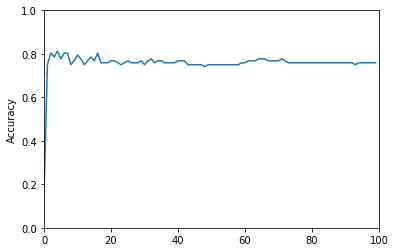

In [29]:
import matplotlib.pyplot as plt
plt.plot(acc)
plt.ylabel('Accuracy')
plt.axis([0, 100, 0, 1])
plt.show()

In [27]:
# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(label_pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [22]:
print(acc.max())
print(acc.argmax(axis=0))

0.82142854
8


In [23]:
# on 1000 epoch
print(sess.run(accuracy, feed_dict={X: X_te, Y: y_test}))

0.7589286


In [240]:
res1=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x1, Y: l1}))
res2=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x2, Y: l2}))
res3=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x3, Y: l3}))
res4=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x4, Y: l4}))
res5=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x5, Y: l5}))
res6=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x6, Y: l6}))
res7=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x7, Y: l7}))
print(res6)

[5 5 5 1 5 5 5]


In [241]:
confusion=[]
x1=np.sum(np.equal(res1, 0))
x2=np.sum(np.equal(res1, 1))
x3=np.sum(np.equal(res1, 2))
x4=np.sum(np.equal(res1, 3))
x5=np.sum(np.equal(res1, 4))
x6=np.sum(np.equal(res1, 5))
x7=np.sum(np.equal(res1, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res2, 0))
x2=np.sum(np.equal(res2, 1))
x3=np.sum(np.equal(res2, 2))
x4=np.sum(np.equal(res2, 3))
x5=np.sum(np.equal(res2, 4))
x6=np.sum(np.equal(res2, 5))
x7=np.sum(np.equal(res2, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res3, 0))
x2=np.sum(np.equal(res3, 1))
x3=np.sum(np.equal(res3, 2))
x4=np.sum(np.equal(res3, 3))
x5=np.sum(np.equal(res3, 4))
x6=np.sum(np.equal(res3, 5))
x7=np.sum(np.equal(res3, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res4, 0))
x2=np.sum(np.equal(res4, 1))
x3=np.sum(np.equal(res4, 2))
x4=np.sum(np.equal(res4, 3))
x5=np.sum(np.equal(res4, 4))
x6=np.sum(np.equal(res4, 5))
x7=np.sum(np.equal(res4, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res5, 0))
x2=np.sum(np.equal(res5, 1))
x3=np.sum(np.equal(res5, 2))
x4=np.sum(np.equal(res5, 3))
x5=np.sum(np.equal(res5, 4))
x6=np.sum(np.equal(res5, 5))
x7=np.sum(np.equal(res5, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res6, 0))
x2=np.sum(np.equal(res6, 1))
x3=np.sum(np.equal(res6, 2))
x4=np.sum(np.equal(res6, 3))
x5=np.sum(np.equal(res6, 4))
x6=np.sum(np.equal(res6, 5))
x7=np.sum(np.equal(res6, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

x1=np.sum(np.equal(res7, 0))
x2=np.sum(np.equal(res7, 1))
x3=np.sum(np.equal(res7, 2))
x4=np.sum(np.equal(res7, 3))
x5=np.sum(np.equal(res7, 4))
x6=np.sum(np.equal(res7, 5))
x7=np.sum(np.equal(res7, 6))
confusion.append([x1,x2,x3,x4,x5,x6,x7])

confusion=np.array(confusion)
print(confusion)

[[ 6  2  5  0  0  0  0]
 [ 1 32  0  0  0  2  0]
 [ 1  1  5  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  1  5  0  0  0  0]
 [ 0  1  0  0  0  6  0]
 [ 0  1  0  0  0  0 41]]


In [24]:
#SVM Classifier
from sklearn.svm import SVC  
from sklearn.metrics import confusion_matrix, cohen_kappa_score
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_tr, y_tr)  

y_pred = svclassifier.predict(X_te)  

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, y_pred)
print(accuracy)

0.9017857142857143


In [197]:
print(confusion_matrix(y_te,y_pred)) 
print(cohen_kappa_score(y_te, y_pred))

[[10  2  0  0  1  0  0]
 [ 1 32  0  0  0  1  1]
 [ 1  1  5  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  2  3  0  1  0  0]
 [ 0  1  0  0  0  6  0]
 [ 0  1  0  0  0  0 41]]
0.7901234567901234
